Netflix Data Analysis and Task on EDA

You have been provided a dataset of Netflix which consists of TV shows and movies available on 
Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. 
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has 
nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 
2,000 titles since 2010, while its number of TV shows has nearly tripled.

Importing Libraries\
Loading the dataset\
Data Cleaning:\
Cleaning individual columns.\
Replace the NaN values from the dataset\
Some Transformations\
Data Visualization: Using plots to find relations between the features.\
Type: Movie and TV Shows\
Rating\
Relation between Type and Rating\

In [18]:
#importing libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#uploading data
df = pd.read_csv('netflix_titles_nov_2019.csv')

In [20]:
df.sample(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
5393,80097472,Sky Ladder: The Art of Cai Guo-Qiang,Kevin MacDonald,Cai Guo-Qiang,United States,"October 14, 2016",2016,TV-MA,80 min,Documentaries,Known for his spectacular pyrotechnic displays...,Movie
3713,80226338,마녀사냥,NaN,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,"February 19, 2018",2015,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Stand...",Four Korean celebrity men and guest stars of b...,TV Show
4412,80164392,Berlin Syndrome,Cate Shortland,"Matthias Habich, Max Riemelt, Teresa Palmer, L...",Australia,"August 25, 2017",2017,R,116 min,"International Movies, Thrillers",What starts as a passionate one-night stand qu...,Movie
5482,80114588,Behind Enemy Lines,NaN,NaN,United States,"August 15, 2016",2001,TV-14,1 Season,"British TV Shows, Docuseries","After dire setbacks in 1940, Winston Churchill...",TV Show
1860,80992672,The Breaker Upperers,"Jackie van Beek, Madeleine Sami","Madeleine Sami, Jackie van Beek, James Rollest...",New Zealand,"February 15, 2019",2018,TV-MA,82 min,"Comedies, Independent Movies, International Mo...","For the right price, BFFs Jen and Mel will rut...",Movie


In [21]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [22]:
# Dataset Shape
df.shape

(5837, 12)

In [23]:
# Total Column
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [24]:
# using describe() method to check some statistical information about the data.
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [25]:
# checking unique value
df.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

In [26]:
# checking duplicate value
df.duplicated().sum()

0

In [27]:
# checking total number of null values column wise.
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

Null Values in Director, Cast, Country

In [28]:
# total number of null values in entire dataset.
df.isnull().sum().sum()

3536

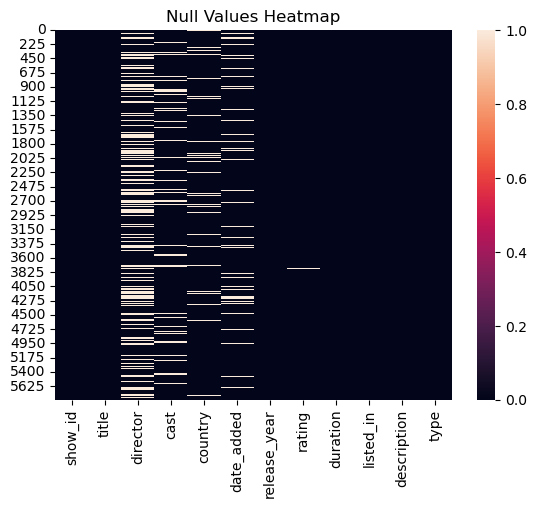

In [29]:
## this is the visual representation of null values present in data
sns.heatmap(df.isnull())
plt.title('Null Values Heatmap')
plt.show()

After check all Tasks Dataset has  Director, Cast, Country and Rating nan values, These Columns no need in task so this will not make any issue in task completuion, instead deleteing these we are keep it in dataframe and replace with relevent values. 


In [80]:
# dealing will null values
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df['rating'].fillna('UR', inplace=True)
df['date_added'].fillna('No Date', inplace=True)

In [81]:
df.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
Date            0
dtype: int64

In [38]:
df['rating'].value_counts()

TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

In [39]:
#Convert Rating column by label encoding 

from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'rating'.
df['rating']= label_encoder.fit_transform(df['rating'])
  
df['rating'].unique()

array([ 6,  7, 10,  8,  9,  5, 11,  3,  0,  4, 12,  2, 13,  1, 14])

In [82]:
df['rating'].value_counts()

8     1937
6     1593
9      678
5      439
4      227
2      218
3      160
11     156
7      147
10     139
12      92
0       32
14      10
13       7
1        2
Name: rating, dtype: int64

There are multiple ways to deal with null values but in this we simply replaced all the null values with NA. as the two columns 'date_added' and 'rating' are not going to be part of our analysis so will drop the columns. and from above we can see that there are no more null values in the dataset.

In [83]:
# Let's check total how many Tv shows and movies are present in the dataset.
df['type'].value_counts()

Movie      3939
TV Show    1898
Name: type, dtype: int64

In [84]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type', 'Date'],
      dtype='object')

# Task 1: Plot a graph showing number of contents on Netflix based on Rating.

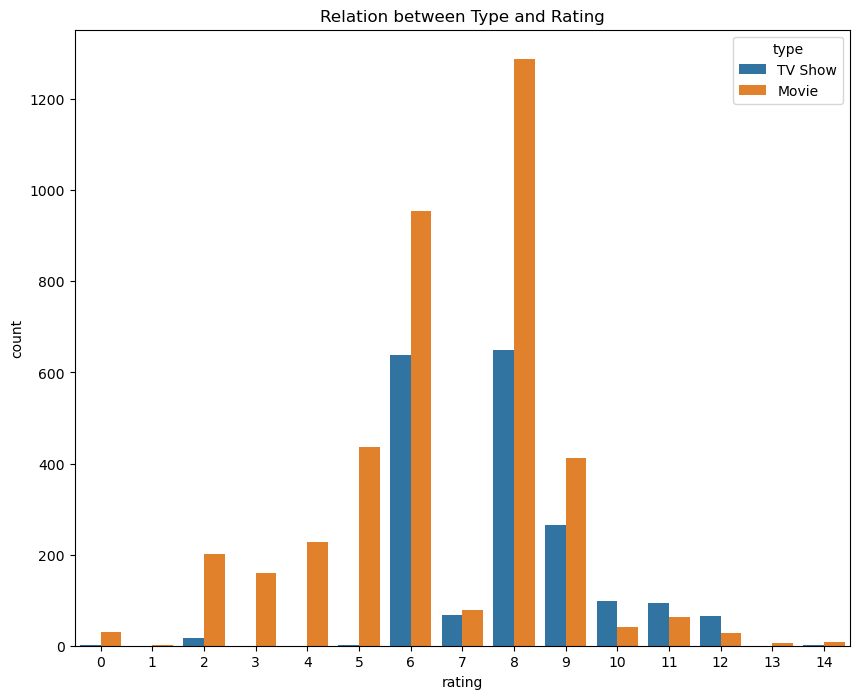

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

# Task 2: Plot a graph showing the number of TV Shows and Movies across different type of Rating.

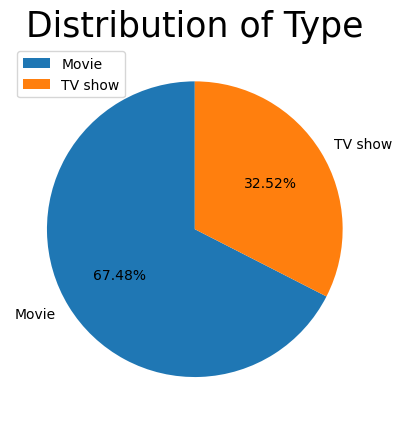

In [87]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
plt.pie(size,labels=labels, startangle = 90, autopct= '%.2f%%')
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

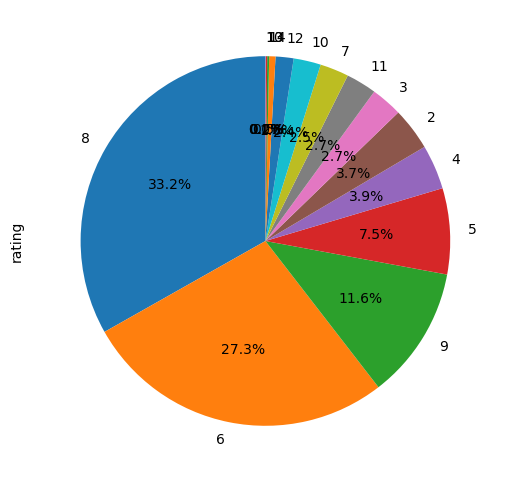

In [88]:
df['rating'].value_counts().plot.pie(startangle = 90,autopct='%1.1f%%',figsize=(8,6))
plt.show()

In [58]:
df.rating

0        6
1        7
2        6
3        6
4       10
        ..
5832     2
5833     6
5834     2
5835     8
5836     2
Name: rating, Length: 5837, dtype: int32

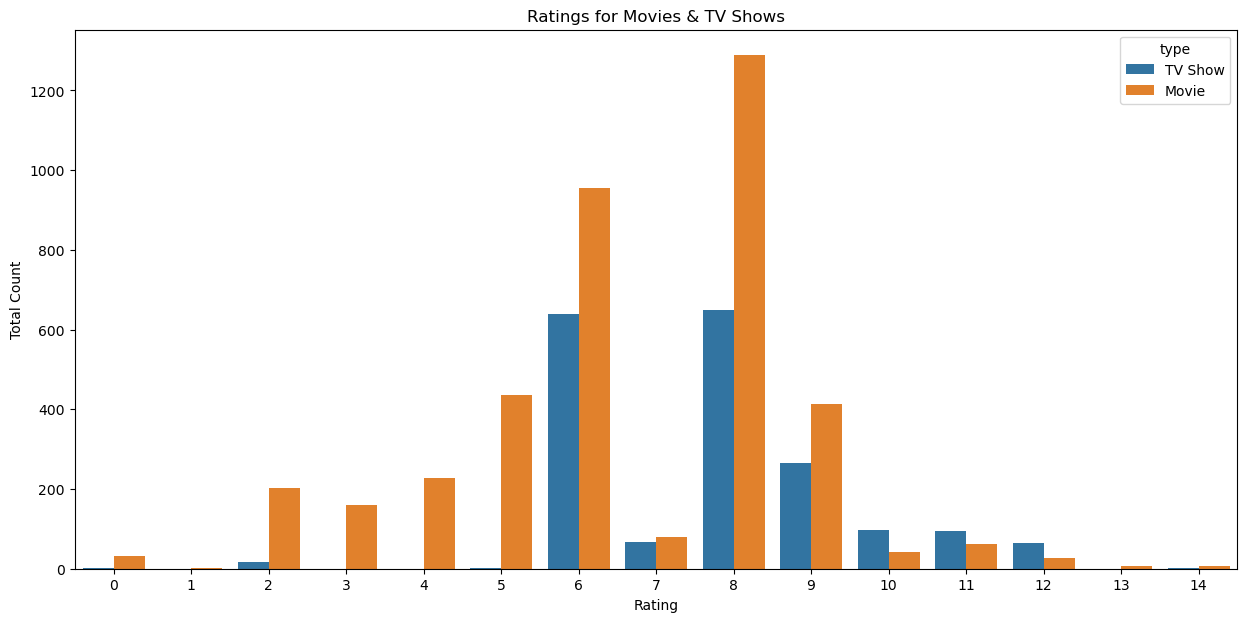

In [89]:
# plot the countplot
plt.figure(figsize=(15,7))
g = sns.countplot(x="rating", hue="type", data=df)
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

# Task 3: Compare India, US, Japan, Spain, UK & Canada to check which country produces highest TV Show and Movies.

In [60]:
df.sample(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1003,855084,Philadelphia,Jonathan Demme,"Tom Hanks, Denzel Washington, Jason Robards, M...",United States,"July 1, 2019",1993,4,126 min,"Classic Movies, Dramas, LGBTQ Movies",Philadelphia attorney Andrew Beckett launches ...,Movie
465,60028097,Good Burger,Brian Robbins,"Kenan Thompson, Kel Mitchell, Abe Vigoda, Dan ...",United States,"October 1, 2019",1997,3,96 min,"Children & Family Movies, Comedies",Two L.A. teens with summer jobs at Good Burger...,Movie


In [94]:
country_names = df['country'].unique()
country_names

array(['South Korea', 'Country Unavailable', 'India',
       'France, Senegal, Belgium', 'Canada, United Kingdom', 'Nigeria',
       'France', 'South Africa', 'United States, Spain, Colombia, Mexico',
       'United States', 'Japan', 'Brazil',
       'Germany, Canada, United States', 'Canada, Norway', 'Poland',
       'Mexico', 'China', 'United States, United Arab Emirates',
       'United States, Japan', 'Spain', 'Singapore, United States',
       'United States, Canada',
       'United Kingdom, Germany, Canada, United States',
       'Australia, France', 'Germany', 'Germany, United Kingdom',
       'Italy, United States',
       'United States, New Zealand, United Kingdom',
       'United Kingdom, Germany, United States', 'United States, Germany',
       'Argentina', 'Taiwan', 'United Kingdom, United States',
       'Finland, Germany, Belgium', 'United Kingdom, France',
       'United States, Spain, Chile, Peru', 'Colombia',
       'United States, Ireland', 'India, United States', 'T

In [95]:
#Per Task only few countries ("India", "United States", "Japan", "Spain", "United Kingdom", "Canada"). So didn't make any 
#changing the blanck values asthey not making any issues in graphs

filtered_countries = df[df["country"].isin(["India", "United States", "Japan", "Spain", "United Kingdom", "Canada"])]

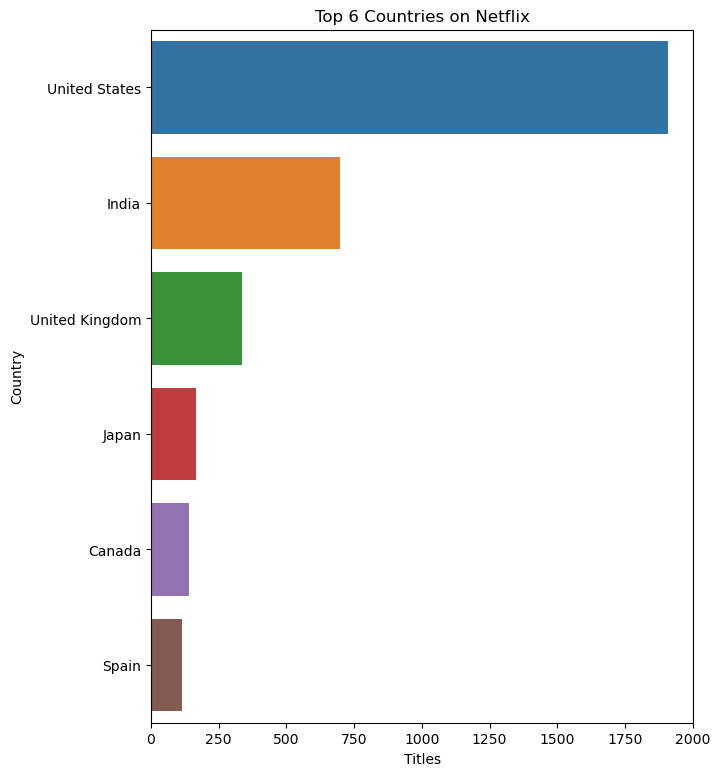

In [96]:
plt.figure(figsize=(7,9))
g = sns.countplot(y=filtered_countries['country'], order=filtered_countries['country'].value_counts().index[:15])
plt.title('Top 6 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

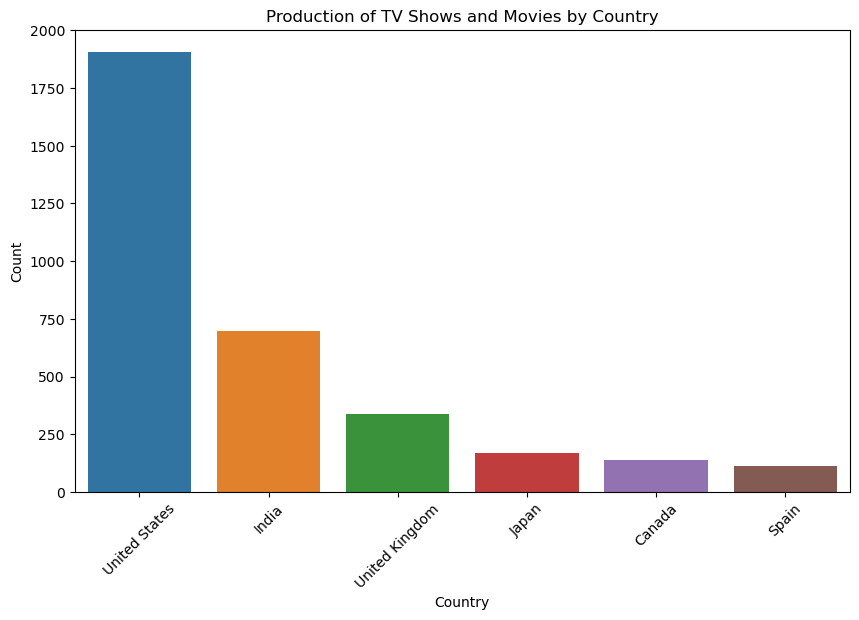

In [97]:
plt.figure(figsize=(10, 6))
countries = ['India', 'United States', 'Japan', 'Spain', 'United Kingdom', 'Canada']
counts = df[df['country'].isin(countries)]['country'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Production of TV Shows and Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Task 4: Plot a graph showing the number of TV Shows and Movies added to Netflix every year.

In [74]:
df['Date'] = df['release_year']

In [75]:
df['Date'].value_counts()

2018    1040
2017     928
2016     818
2019     762
2015     502
        ... 
1955       1
1956       1
1947       1
2020       1
1954       1
Name: Date, Length: 71, dtype: int64

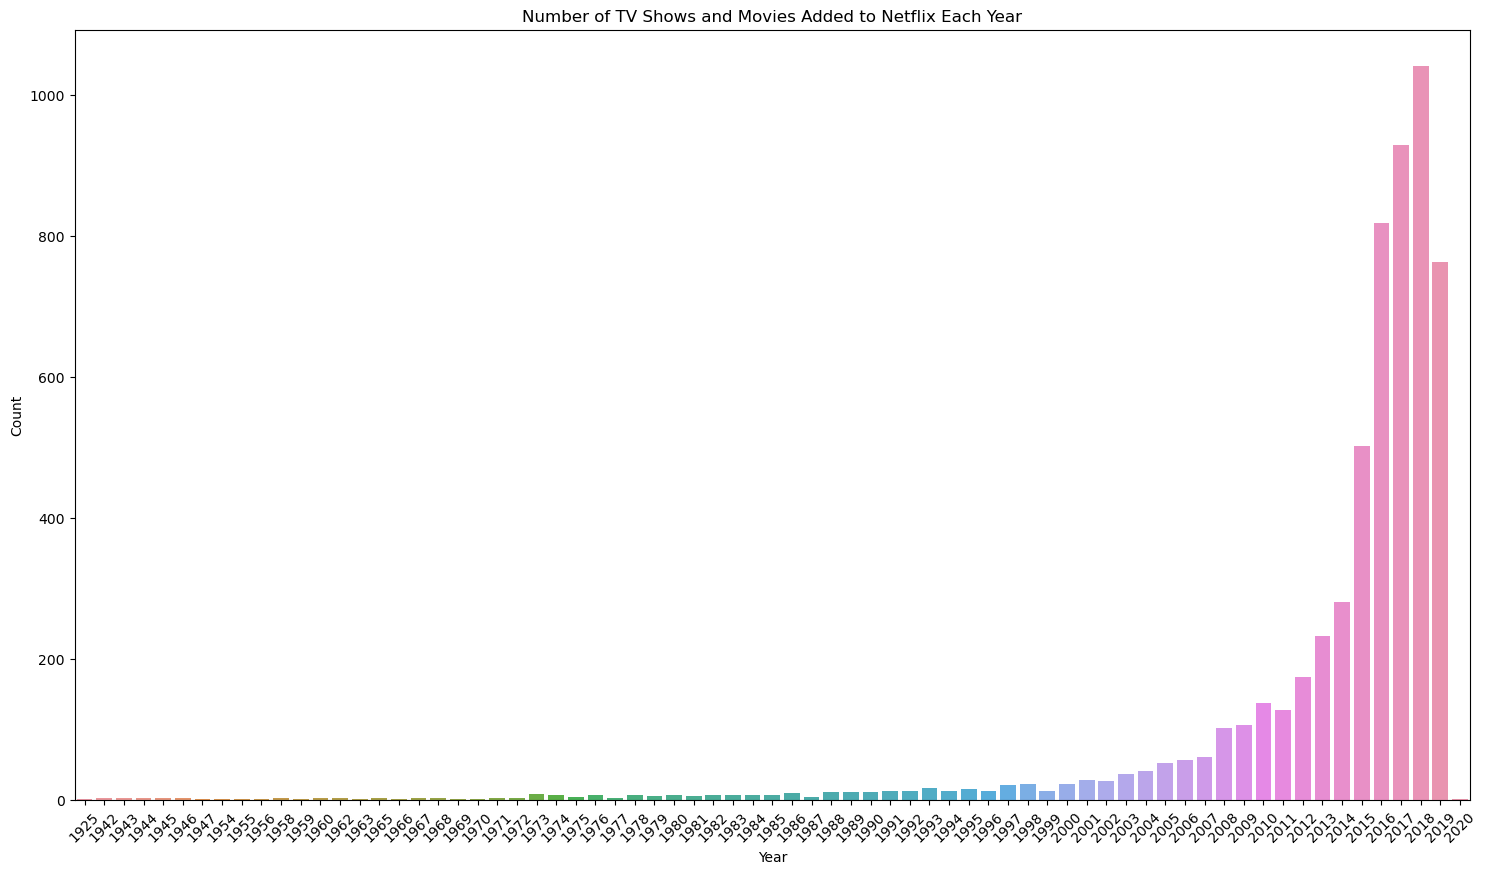

In [98]:
plt.figure(figsize=(18, 10))
year_counts = df['release_year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of TV Shows and Movies Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

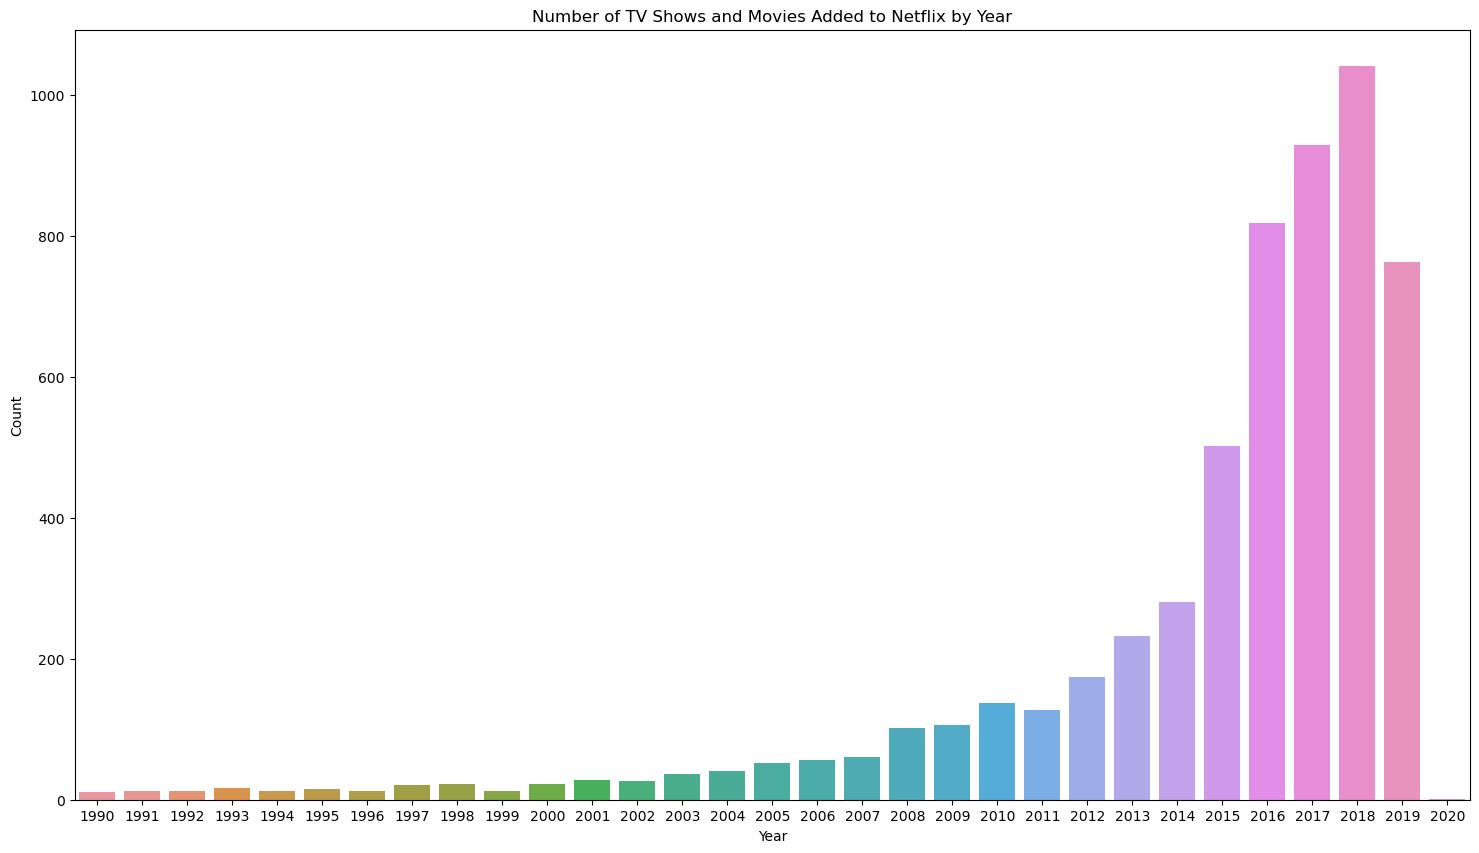

In [99]:
#Before 1990 there are not much movies and TV show. So taking Graph value after 1990
plt.figure(figsize=(18, 10))
filtered_years = df1[df1['release_year'] >= 1990]
year_counts = filtered_years['release_year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of TV Shows and Movies Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Task 5: In 2019, Find out if Netflix has added more TV Shows or Movies to their platform and represent the same visually.

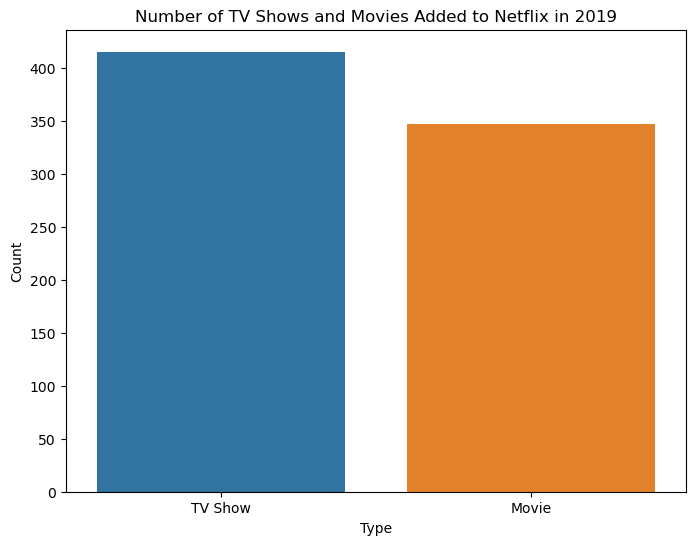

In [100]:
df_2019 = df[df['release_year'] == 2019]
counts_2019 = df_2019['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=counts_2019.index, y=counts_2019.values)
plt.title('Number of TV Shows and Movies Added to Netflix in 2019')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()